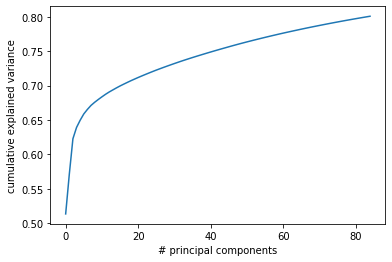

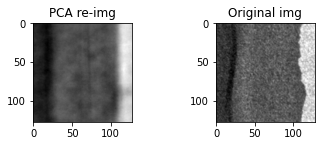

[15:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.60021
[1]	train-mlogloss:1.44895
[2]	train-mlogloss:1.32613
[3]	train-mlogloss:1.21978
[4]	train-mlogloss:1.12859
[5]	train-mlogloss:1.04696
[6]	train-mlogloss:0.97291
[7]	train-mlogloss:0.90831
[8]	train-mlogloss:0.85007
[9]	train-mlogloss:0.79594
[10]	train-mlogloss:0.74830
[11]	train-mlogloss:0.70336
[12]	train-mlogloss:0.66274
[13]	train-mlogloss:0.62580
[14]	train-mlogloss:0.59220
[15]	train-mlogloss:0.55996
[16]	train-mlogloss:0.53107
[17]	train-mlogloss:0.50452
[18]	train-mlogloss:0.47985
[19]	train-mlogloss:0.45688
[20]	train-mlogloss:0.43612
[21]	train-mlogloss:0.41544
[22]	train-mlogloss:0.39737
[23]	train-mlogloss:0.37892
[24]	train-mlogloss:0.36329


In [2]:
%run pca_knn.ipynb

In [4]:
# print(sum(xgbmodel.predict(dtrain) == train_label) / len(train_label))

1.0


In [3]:
# load model
# print(sum(xgbmodel.predict(dval) == y_valid) / len(y_valid))

In [4]:
# print(sum(xgbmodel.predict(dtrain) == y_train) / len(y_train))

0.9926512153759186


# Test

In [3]:
test_img = []
test_label = []

In [4]:
img = 0
for file in os.listdir(test_img_path):
    img = Image.open(test_img_path + '/' + file)
    img = img.resize((128, 128))
    im = np.array(img).reshape(-1)
    test_img.append(im)
test_img = np.array(test_img)

In [5]:
transform_test = pca.transform(test_img)
transform_train.shape, transform_test.shape

((12640, 85), (10142, 85))

In [6]:
# dtest = xgboost.DMatrix(test_img)

In [4]:
# tsne_test = TSNE(2, test_img)

In [7]:
test_y = knn.predict(dtest)

In [25]:
# test_y = clf.predict(test_img)

# Submission

In [8]:
import pandas as pd

In [9]:
submission = pd.read_csv(test_label_file)

In [10]:
for i in range(len(test_y)):
    submission.loc[i, 'Label'] = str(test_y[i])

In [11]:
submission.describe()

,ID,Label
count,10142,10142
unique,10142,6
top,test_05915.png,0.0
freq,1,3208


In [12]:
submission.to_csv('submissionPCAXGB_aug.csv', index=False)